In [ ]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
import time

In [ ]:
url = 'https://www.flipkart.com/search?q=laptop&as=on&as-show=on&otracker=AS_Query_HistoryAutoSuggest_2_0_na_na_na&otracker1=AS_Query_HistoryAutoSuggest_2_0_na_na_na&as-pos=2&as-type=HISTORY&suggestionId=laptop&requestId=423e483c-54d0-4e20-b2b9-20c6c8eb0a4b&page=1'

In [ ]:
page = requests.get(url)

In [ ]:
page.status_code

200

In [ ]:
pagecontent = page.text

In [ ]:
soup = BeautifulSoup(pagecontent)

In [ ]:
for x in soup.find_all('div', attrs={'class' : "_4rR01T"}):
    print(x.text)

CHUWI Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) CoreBook X Grey Laptop
CHUWI Celeron Dual Core 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) HeroBook Pro Laptop
ASUS Vivobook 15 Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515EA-EJ522WS Thin and Light La...
HP 15s (2023) Athlon Dual Core 3050U - (8 GB/512 GB SSD/Windows 11 Home) 15s-ey1509AU Thin and Light L...
HP Intel Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s- fr4000TU Thin and Light Laptop
ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515EA-EJ322WS | X515EA-EJ328WS ...
Lenovo V15 Ryzen 5 Hexa Core 5500U - (8 GB/512 GB SSD/Windows 11 Home) V15 G2 ALC Thin and Light Lapto...
Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 81X800J3IN|81X800LGIN...
APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/Mac OS Big Sur) MGN63HN/A
HP 15s (2023) Intel Core i5 11th Gen - (16 GB/512 GB SSD/Windows 11 Home) 15s-fr4001TU Thin and Light ...
Lenovo IdeaPad Slim 3 In

In [ ]:
for x in soup.find_all('div', attrs={'class' : "_1_WHN1"}):
    print(x.text)

₹24,990
₹19,990
₹42,990
₹31,990
₹49,990
₹34,990
₹35,990
₹35,990
₹81,990
₹52,990
₹48,990
₹1,14,990
₹36,999
₹39,990
₹30,890
₹26,990
₹40,490
₹48,990
₹40,999
₹35,990
₹37,990
₹87,990
₹34,990
₹58,990


In [ ]:
for x in soup.find_all('div' , attrs={'class':'_3LWZlK'}):
    print(x.text)

4.4
4.2
4.3
4
4.3
4.2
4.2
4.3
4.7
4.3
4.2
4.7
4.4
4.3
4.1
4.1
4.3
4.3
4.3
4.3
4
4.3
4.3
4.4
5
5
4.2
5
4
4.3
4
4
4.3
3
2
4.3
4
5


# productname, price ,specifications ,ratings ,pagenum

In [ ]:
productname=[]
price=[]
specifications=[]
rating=[]
pagenum=[]



for i in range(1,50):
    start_time = time.time()
    url = 'https://www.flipkart.com/search?q=laptop&as=on&as-show=on&otracker=AS_Query_HistoryAutoSuggest_2_0_na_na_na&otracker1=AS_Query_HistoryAutoSuggest_2_0_na_na_na&as-pos=2&as-type=HISTORY&suggestionId=laptop&requestId=423e483c-54d0-4e20-b2b9-20c6c8eb0a4b&page={}'.format(i)
    page = requests.get(url)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)

    for x in soup.find_all('div', attrs={'class': '_2kHMtA'}):
        pname = x.find('div', attrs={'class' : "_4rR01T"})
        cost = x.find('div', attrs={'class' : "_1_WHN1"})
        features = x.find('ul' , attrs={'class':'_1xgFaf'})
        ratng = x.find('div' , attrs={'class':'_3LWZlK'})


        if pname is None:
            productname.append(np.NaN)
        else:
            productname.append(pname.text)

        if cost is None:
            price.append(np.NaN)
        else:
            price.append(cost.text)

        if features is None:
            specifications.append(np.NaN)
        else:
            specifications.append(features.text)

        if ratng is None:
            rating.append(np.NaN)
        else:
            rating.append(ratng.text)

        pagenum.append(i)

    print('Page {} completed in {} seconds'.format(i, time.time() -  start_time))

Page 1 completed in 1.5676515102386475 seconds
Page 2 completed in 1.831294298171997 seconds
Page 3 completed in 2.033237934112549 seconds
Page 4 completed in 1.8201825618743896 seconds
Page 5 completed in 2.003889322280884 seconds
Page 6 completed in 1.707686185836792 seconds
Page 7 completed in 1.6076340675354004 seconds
Page 8 completed in 1.7476627826690674 seconds
Page 9 completed in 2.107393741607666 seconds
Page 10 completed in 1.8434224128723145 seconds
Page 11 completed in 1.464690923690796 seconds
Page 12 completed in 1.8332750797271729 seconds
Page 13 completed in 1.5104148387908936 seconds
Page 14 completed in 1.3997583389282227 seconds
Page 15 completed in 1.487034797668457 seconds
Page 16 completed in 1.5140581130981445 seconds
Page 17 completed in 1.5485780239105225 seconds
Page 18 completed in 2.193169116973877 seconds
Page 19 completed in 1.5443313121795654 seconds
Page 20 completed in 1.5844345092773438 seconds
Page 21 completed in 1.372864007949829 seconds
Page 22 co

In [ ]:
len(productname)

984

In [ ]:
laptops = pd.DataFrame({'productname':productname , 'price': price , 'specifications': specifications , 'rating':rating , 'pagenumber': pagenum})

In [ ]:
laptops.head()

,productname,price,specifications,rating,pagenumber
0,CHUWI Core i3 10th Gen - (8 GB/512 GB SSD/Wind...,"₹24,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,4.4,1
1,CHUWI Celeron Dual Core 11th Gen - (8 GB/256 G...,"₹19,990",Intel Celeron Dual Core Processor (11th Gen)8 ...,4.2,1
2,HP 15s (2023) Athlon Dual Core 3050U - (8 GB/5...,"₹31,990",AMD Athlon Dual Core Processor8 GB DDR4 RAMWin...,4,1
3,ASUS Vivobook 15 Core i5 11th Gen - (8 GB/512 ...,"₹42,990",Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...,4.3,1
4,ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 ...,"₹34,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,4.2,1


In [ ]:
laptops['productname'].unique()

array(['CHUWI Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) CoreBook X Grey Laptop',
       'CHUWI Celeron Dual Core 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) HeroBook Pro Laptop',
       'HP 15s (2023) Athlon Dual Core 3050U - (8 GB/512 GB SSD/Windows 11 Home) 15s-ey1509AU Thin and Light L...',
       'ASUS Vivobook 15 Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515EA-EJ522WS Thin and Light La...',
       'ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515EA-EJ322WS | X515EA-EJ328WS ...',
       'HP Intel Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s- fr4000TU Thin and Light Laptop',
       'HP 247 G8 Athlon Dual Core AMD Athlon P3045B - (8 GB/1 TB HDD/Windows 11 Home) 67U77PA Laptop',
       'Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 81X800J3IN|81X800LGIN...',
       'HP 15s (2023) Intel Core i5 11th Gen - (16 GB/512 GB SSD/Windows 11 Home) 15s-fr4001TU Thin and Light ...',
       'Lenovo In

In [ ]:
laptops.tail()

,productname,price,specifications,rating,pagenumber
979,Acer Predator Helios 300 Core i7 10th Gen - (1...,"₹1,50,490",Intel Core i7 Processor (10th Gen)16 GB DDR4 R...,4.7,41
980,Lenovo IdeaPad 3 Core i3 12th Gen - (8 GB/512 ...,"₹37,990",Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,4,41
981,Lenovo LOQ Ryzen 7 Octa Core 7840HS - (16 GB/5...,"₹99,990",AMD Ryzen 7 Octa Core Processor16 GB DDR5 RAMW...,NaN,41
982,Acer Aspire 5 Ryzen 7 Octa Core 5700U - (8 GB/...,"₹55,990",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,5,41
983,ASUS Core i5 13th Gen - (16 GB/512 GB SSD/Wind...,"₹64,400",Intel Core i5 Processor (13th Gen)16 GB DDR5 R...,NaN,41


In [ ]:
laptops['productname'] = laptops['productname'].apply(lambda x: ''.join(x))

In [ ]:
laptops['price'] = laptops['price'].apply(lambda x: ''.join(x))

In [ ]:
laptops.to_csv('mobile_df.csv')

In [ ]:
laptops['productname'][5]

'HP Intel Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s- fr4000TU Thin and Light Laptop'

In [ ]:
laptops['specifications'][0]

'Intel Core i3 Processor (10th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD35.56 cm (14 inch) DisplayWPS Office, Operating System Software1 Year Onsite Warranty'

In [ ]:
# extract brand
regex = r'^\w+'
laptops['brand']= laptops['productname'].apply(lambda x: re.compile(regex).findall(x))

In [ ]:
laptops.tail()

,productname,price,specifications,rating,pagenumber,brand
979,Acer Predator Helios 300 Core i7 10th Gen - (1...,"₹1,50,490",Intel Core i7 Processor (10th Gen)16 GB DDR4 R...,4.7,41,[Acer]
980,Lenovo IdeaPad 3 Core i3 12th Gen - (8 GB/512 ...,"₹37,990",Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,4,41,[Lenovo]
981,Lenovo LOQ Ryzen 7 Octa Core 7840HS - (16 GB/5...,"₹99,990",AMD Ryzen 7 Octa Core Processor16 GB DDR5 RAMW...,NaN,41,[Lenovo]
982,Acer Aspire 5 Ryzen 7 Octa Core 5700U - (8 GB/...,"₹55,990",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,5,41,[Acer]
983,ASUS Core i5 13th Gen - (16 GB/512 GB SSD/Wind...,"₹64,400",Intel Core i5 Processor (13th Gen)16 GB DDR5 R...,NaN,41,[ASUS]


In [ ]:
# extract RAM
regex = r'[0-9]*[0-9]\sGB\s[A-Z]*[A-Z]*DDR[0-9]'
laptops['RAM']= laptops['specifications'].apply(lambda x: re.compile(regex).findall(x))

In [ ]:
laptops.tail()

,productname,price,specifications,rating,pagenumber,brand,RAM
979,Acer Predator Helios 300 Core i7 10th Gen - (1...,"₹1,50,490",Intel Core i7 Processor (10th Gen)16 GB DDR4 R...,4.7,41,[Acer],[16 GB DDR4]
980,Lenovo IdeaPad 3 Core i3 12th Gen - (8 GB/512 ...,"₹37,990",Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,4,41,[Lenovo],[8 GB DDR4]
981,Lenovo LOQ Ryzen 7 Octa Core 7840HS - (16 GB/5...,"₹99,990",AMD Ryzen 7 Octa Core Processor16 GB DDR5 RAMW...,NaN,41,[Lenovo],[16 GB DDR5]
982,Acer Aspire 5 Ryzen 7 Octa Core 5700U - (8 GB/...,"₹55,990",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,5,41,[Acer],[8 GB DDR4]
983,ASUS Core i5 13th Gen - (16 GB/512 GB SSD/Wind...,"₹64,400",Intel Core i5 Processor (13th Gen)16 GB DDR5 R...,NaN,41,[ASUS],[16 GB DDR5]


In [ ]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   productname     984 non-null    object
 1   price           984 non-null    object
 2   specifications  984 non-null    object
 3   rating          747 non-null    object
 4   pagenumber      984 non-null    int64 
 5   brand           984 non-null    object
 6   RAM             984 non-null    object
dtypes: int64(1), object(6)
memory usage: 53.9+ KB


In [ ]:
laptops.isnull().sum()

productname         0
price               0
specifications      0
rating            237
pagenumber          0
brand               0
RAM                 0
dtype: int64

In [ ]:
laptops['brand'] = laptops['brand'].apply(lambda x: ''.join(x))
laptops['RAM'] = laptops['RAM'].apply(lambda x: ''.join(x))
laptops['price'] = laptops['price'].apply(lambda x: x.replace('₹','').replace(",",'')).astype(float)

In [ ]:
laptops.tail()

,productname,price,specifications,rating,pagenumber,brand,RAM
979,Acer Predator Helios 300 Core i7 10th Gen - (1...,150490.0,Intel Core i7 Processor (10th Gen)16 GB DDR4 R...,4.7,41,Acer,16 GB DDR4
980,Lenovo IdeaPad 3 Core i3 12th Gen - (8 GB/512 ...,37990.0,Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,4,41,Lenovo,8 GB DDR4
981,Lenovo LOQ Ryzen 7 Octa Core 7840HS - (16 GB/5...,99990.0,AMD Ryzen 7 Octa Core Processor16 GB DDR5 RAMW...,NaN,41,Lenovo,16 GB DDR5
982,Acer Aspire 5 Ryzen 7 Octa Core 5700U - (8 GB/...,55990.0,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,5,41,Acer,8 GB DDR4
983,ASUS Core i5 13th Gen - (16 GB/512 GB SSD/Wind...,64400.0,Intel Core i5 Processor (13th Gen)16 GB DDR5 R...,NaN,41,ASUS,16 GB DDR5


In [ ]:
laptops.isnull().sum()

productname         0
price               0
specifications      0
rating            237
pagenumber          0
brand               0
RAM                 0
dtype: int64

In [ ]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   productname     984 non-null    object 
 1   price           984 non-null    float64
 2   specifications  984 non-null    object 
 3   rating          747 non-null    object 
 4   pagenumber      984 non-null    int64  
 5   brand           984 non-null    object 
 6   RAM             984 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 53.9+ KB


In [ ]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   productname     984 non-null    object 
 1   price           984 non-null    float64
 2   specifications  984 non-null    object 
 3   rating          747 non-null    object 
 4   pagenumber      984 non-null    int64  
 5   brand           984 non-null    object 
 6   RAM             984 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 53.9+ KB


In [ ]:
laptops = laptops.fillna(0)

In [ ]:
laptops.tail()

,productname,price,specifications,rating,pagenumber,brand,RAM
979,Acer Predator Helios 300 Core i7 10th Gen - (1...,150490.0,Intel Core i7 Processor (10th Gen)16 GB DDR4 R...,4.7,41,Acer,16 GB DDR4
980,Lenovo IdeaPad 3 Core i3 12th Gen - (8 GB/512 ...,37990.0,Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,4,41,Lenovo,8 GB DDR4
981,Lenovo LOQ Ryzen 7 Octa Core 7840HS - (16 GB/5...,99990.0,AMD Ryzen 7 Octa Core Processor16 GB DDR5 RAMW...,0,41,Lenovo,16 GB DDR5
982,Acer Aspire 5 Ryzen 7 Octa Core 5700U - (8 GB/...,55990.0,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,5,41,Acer,8 GB DDR4
983,ASUS Core i5 13th Gen - (16 GB/512 GB SSD/Wind...,64400.0,Intel Core i5 Processor (13th Gen)16 GB DDR5 R...,0,41,ASUS,16 GB DDR5


In [ ]:
laptops = laptops.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
laptops.tail()

,productname,price,specifications,rating,pagenumber,brand,RAM
979,Acer Predator Helios 300 Core i7 10th Gen - (1...,150490.0,Intel Core i7 Processor (10th Gen)16 GB DDR4 R...,4.7,41,Acer,16 GB DDR4
980,Lenovo IdeaPad 3 Core i3 12th Gen - (8 GB/512 ...,37990.0,Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,4,41,Lenovo,8 GB DDR4
981,Lenovo LOQ Ryzen 7 Octa Core 7840HS - (16 GB/5...,99990.0,AMD Ryzen 7 Octa Core Processor16 GB DDR5 RAMW...,0,41,Lenovo,16 GB DDR5
982,Acer Aspire 5 Ryzen 7 Octa Core 5700U - (8 GB/...,55990.0,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,5,41,Acer,8 GB DDR4
983,ASUS Core i5 13th Gen - (16 GB/512 GB SSD/Wind...,64400.0,Intel Core i5 Processor (13th Gen)16 GB DDR5 R...,0,41,ASUS,16 GB DDR5


In [ ]:
laptops = laptops.fillna(0)

In [ ]:
laptops.tail()

,productname,price,specifications,rating,pagenumber,brand,RAM
979,Acer Predator Helios 300 Core i7 10th Gen - (1...,150490.0,Intel Core i7 Processor (10th Gen)16 GB DDR4 R...,4.7,41,Acer,16 GB DDR4
980,Lenovo IdeaPad 3 Core i3 12th Gen - (8 GB/512 ...,37990.0,Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,4,41,Lenovo,8 GB DDR4
981,Lenovo LOQ Ryzen 7 Octa Core 7840HS - (16 GB/5...,99990.0,AMD Ryzen 7 Octa Core Processor16 GB DDR5 RAMW...,0,41,Lenovo,16 GB DDR5
982,Acer Aspire 5 Ryzen 7 Octa Core 5700U - (8 GB/...,55990.0,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,5,41,Acer,8 GB DDR4
983,ASUS Core i5 13th Gen - (16 GB/512 GB SSD/Wind...,64400.0,Intel Core i5 Processor (13th Gen)16 GB DDR5 R...,0,41,ASUS,16 GB DDR5


In [ ]:
laptops.isnull().sum()

productname       0
price             0
specifications    0
rating            0
pagenumber        0
brand             0
RAM               0
dtype: int64

In [ ]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   productname     984 non-null    object 
 1   price           984 non-null    float64
 2   specifications  984 non-null    object 
 3   rating          984 non-null    object 
 4   pagenumber      984 non-null    int64  
 5   brand           984 non-null    object 
 6   RAM             984 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 53.9+ KB


In [ ]:
laptops['rating'] = laptops['rating'].astype(float)

In [ ]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   productname     984 non-null    object 
 1   price           984 non-null    float64
 2   specifications  984 non-null    object 
 3   rating          984 non-null    float64
 4   pagenumber      984 non-null    int64  
 5   brand           984 non-null    object 
 6   RAM             984 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 53.9+ KB


In [ ]:
# measure of central tendency
laptops.describe()

,price,rating,pagenumber
count,984.000000,984.000000,984.000000
mean,72577.348577,3.246240,21.000000
std,58794.325330,1.845951,11.838176
min,14990.000000,0.000000,1.000000
25%,37990.000000,3.400000,11.000000
50%,51990.000000,4.200000,21.000000
75%,87990.000000,4.300000,31.000000
max,548990.000000,5.000000,41.000000


In [ ]:
laptops

,productname,price,specifications,rating,pagenumber,brand,RAM
0,CHUWI Core i3 10th Gen - (8 GB/512 GB SSD/Wind...,24990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,4.4,1,CHUWI,8 GB DDR4
1,CHUWI Celeron Dual Core 11th Gen - (8 GB/256 G...,19990.0,Intel Celeron Dual Core Processor (11th Gen)8 ...,4.2,1,CHUWI,8 GB DDR4
2,HP 15s (2023) Athlon Dual Core 3050U - (8 GB/5...,31990.0,AMD Athlon Dual Core Processor8 GB DDR4 RAMWin...,4.0,1,HP,8 GB DDR4
3,ASUS Vivobook 15 Core i5 11th Gen - (8 GB/512 ...,42990.0,Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...,4.3,1,ASUS,8 GB DDR4
4,ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 ...,34990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,4.2,1,ASUS,8 GB DDR4
...,...,...,...,...,...,...,...
979,Acer Predator Helios 300 Core i7 10th Gen - (1...,150490.0,Intel Core i7 Processor (10th Gen)16 GB DDR4 R...,4.7,41,Acer,16 GB DDR4
980,Lenovo IdeaPad 3 Core i3 12th Gen - (8 GB/512 ...,37990.0,Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,4.0,41,Lenovo,8 GB DDR4
981,Lenovo LOQ Ryzen 7 Octa Core 7840HS - (16 GB/5...,99990.0,AMD Ryzen 7 Octa Core Processor16 GB DDR5 RAMW...,0.0,41,Lenovo,16 GB DDR5
982,Acer Aspire 5 Ryzen 7 Octa Core 5700U - (8 GB/...,55990.0,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,5.0,41,Acer,8 GB DDR4


# removing outliers

In [ ]:
laptops.describe()

,price,rating,pagenumber
count,984.000000,984.000000,984.000000
mean,72577.348577,3.246240,21.000000
std,58794.325330,1.845951,11.838176
min,14990.000000,0.000000,1.000000
25%,37990.000000,3.400000,11.000000
50%,51990.000000,4.200000,21.000000
75%,87990.000000,4.300000,31.000000
max,548990.000000,5.000000,41.000000


In [ ]:
min_thresold = laptops.price.quantile(0.20)
min_thresold

35990.0

In [ ]:
laptops = laptops[(laptops.price>min_thresold)]

In [ ]:
laptops.tail()

,productname,price,specifications,rating,pagenumber,brand,RAM
979,Acer Predator Helios 300 Core i7 10th Gen - (1...,150490.0,Intel Core i7 Processor (10th Gen)16 GB DDR4 R...,4.7,41,Acer,16 GB DDR4
980,Lenovo IdeaPad 3 Core i3 12th Gen - (8 GB/512 ...,37990.0,Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,4.0,41,Lenovo,8 GB DDR4
981,Lenovo LOQ Ryzen 7 Octa Core 7840HS - (16 GB/5...,99990.0,AMD Ryzen 7 Octa Core Processor16 GB DDR5 RAMW...,0.0,41,Lenovo,16 GB DDR5
982,Acer Aspire 5 Ryzen 7 Octa Core 5700U - (8 GB/...,55990.0,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,5.0,41,Acer,8 GB DDR4
983,ASUS Core i5 13th Gen - (16 GB/512 GB SSD/Wind...,64400.0,Intel Core i5 Processor (13th Gen)16 GB DDR5 R...,0.0,41,ASUS,16 GB DDR5


In [ ]:
laptops.reset_index(inplace=True)

In [ ]:
laptops

,index,productname,price,specifications,rating,pagenumber,brand,RAM
0,3,ASUS Vivobook 15 Core i5 11th Gen - (8 GB/512 ...,42990.0,Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...,4.3,1,ASUS,8 GB DDR4
1,5,HP Intel Core i5 11th Gen - (8 GB/512 GB SSD/W...,49990.0,Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...,4.3,1,HP,8 GB DDR4
2,8,HP 15s (2023) Intel Core i5 11th Gen - (16 GB/...,52990.0,Intel Core i5 Processor (11th Gen)16 GB DDR4 R...,4.3,1,HP,16 GB DDR4
3,10,Lenovo LOQ Core i7 13th Gen - (16 GB/512 GB SS...,114990.0,Intel Core i7 Processor (13th Gen)16 GB DDR5 R...,4.7,1,Lenovo,16 GB DDR5
4,11,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen -...,48990.0,Intel Core i5 Processor (11th Gen)16 GB DDR4 R...,4.2,1,Lenovo,16 GB DDR4
...,...,...,...,...,...,...,...,...
775,979,Acer Predator Helios 300 Core i7 10th Gen - (1...,150490.0,Intel Core i7 Processor (10th Gen)16 GB DDR4 R...,4.7,41,Acer,16 GB DDR4
776,980,Lenovo IdeaPad 3 Core i3 12th Gen - (8 GB/512 ...,37990.0,Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,4.0,41,Lenovo,8 GB DDR4
777,981,Lenovo LOQ Ryzen 7 Octa Core 7840HS - (16 GB/5...,99990.0,AMD Ryzen 7 Octa Core Processor16 GB DDR5 RAMW...,0.0,41,Lenovo,16 GB DDR5
778,982,Acer Aspire 5 Ryzen 7 Octa Core 5700U - (8 GB/...,55990.0,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,5.0,41,Acer,8 GB DDR4


# EDA

# univariate analysis

<Axes: xlabel='brand'>

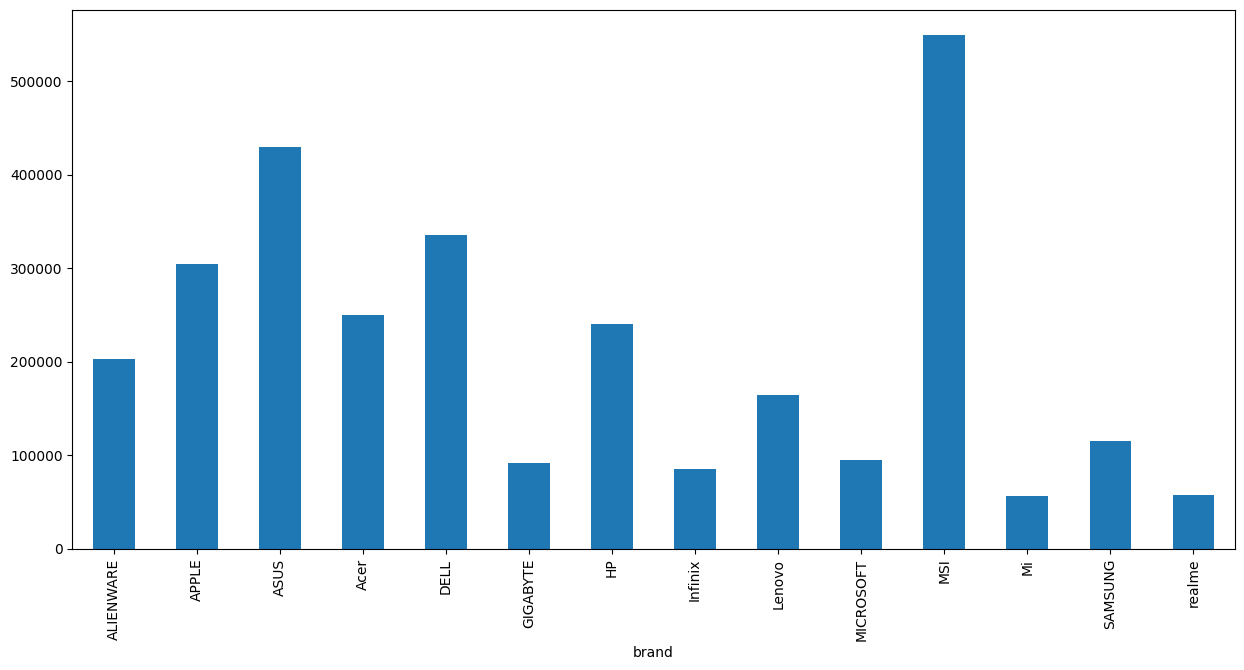

In [ ]:
plt.figure(figsize=(15, 7))
laptops.groupby(['brand'])['price'].max().plot(kind = 'bar')

<Axes: >

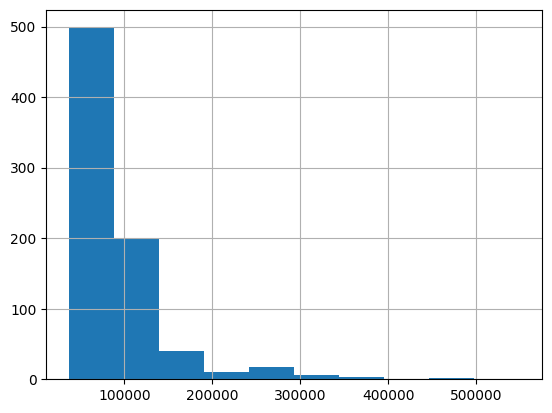

In [ ]:
laptops['price'].hist()

<Axes: xlabel='brand', ylabel='count'>

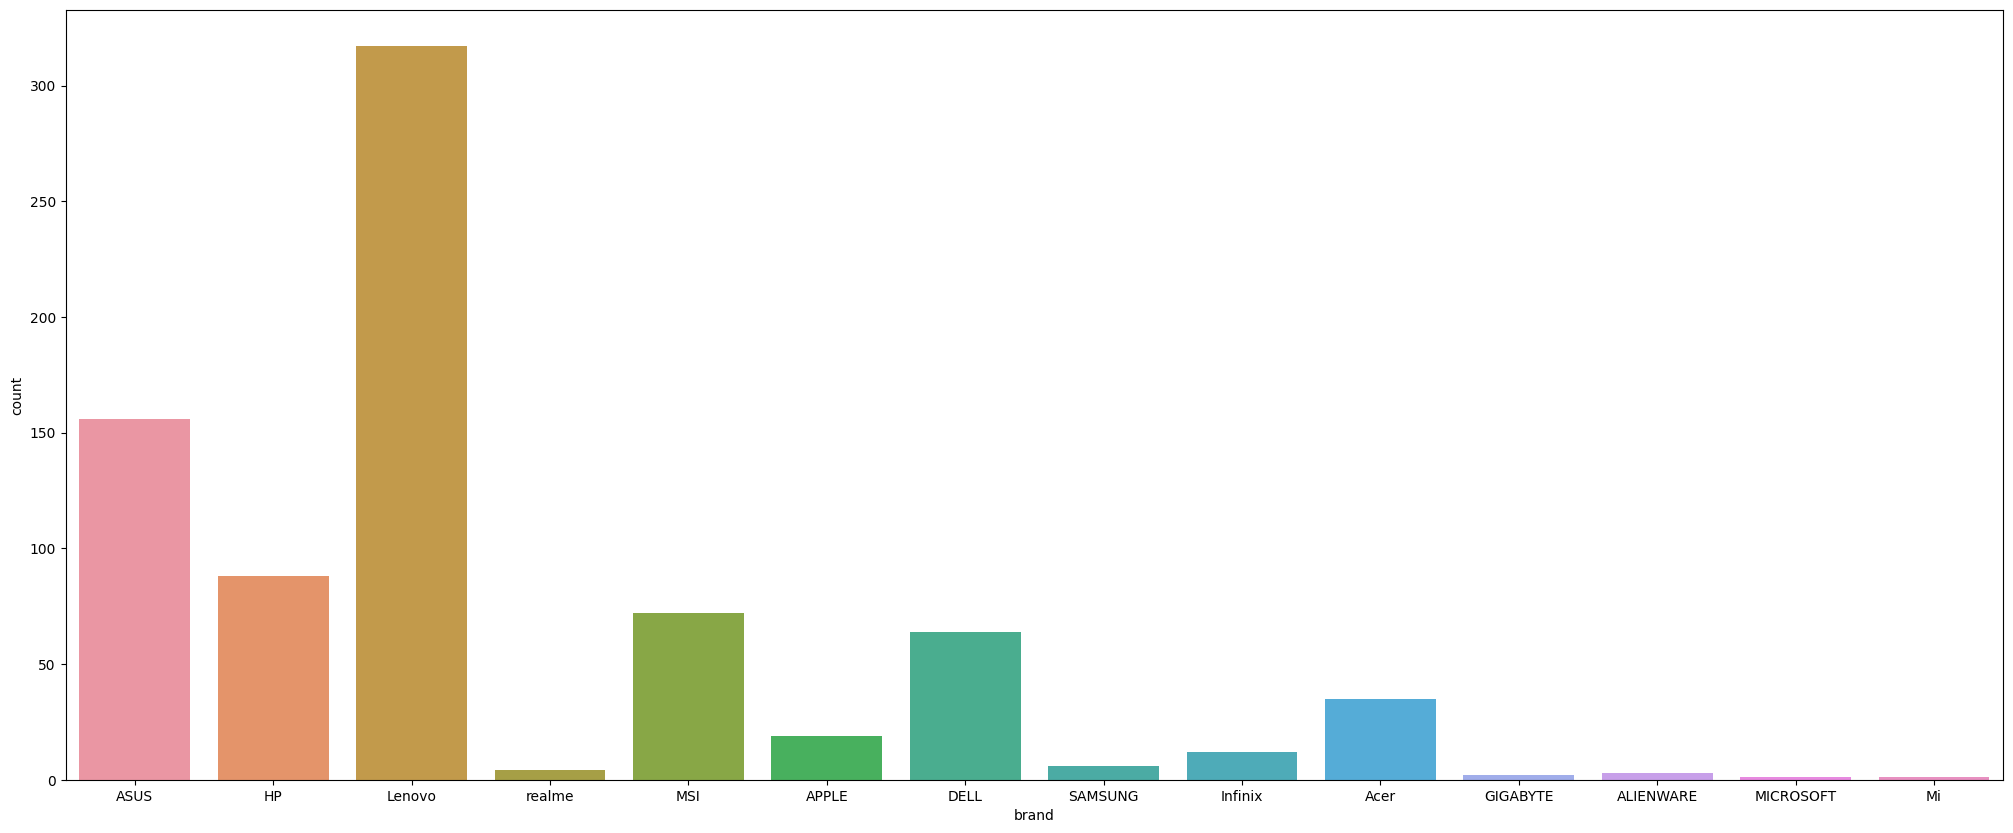

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(data = laptops, x = 'brand')

<Axes: xlabel='rating', ylabel='count'>

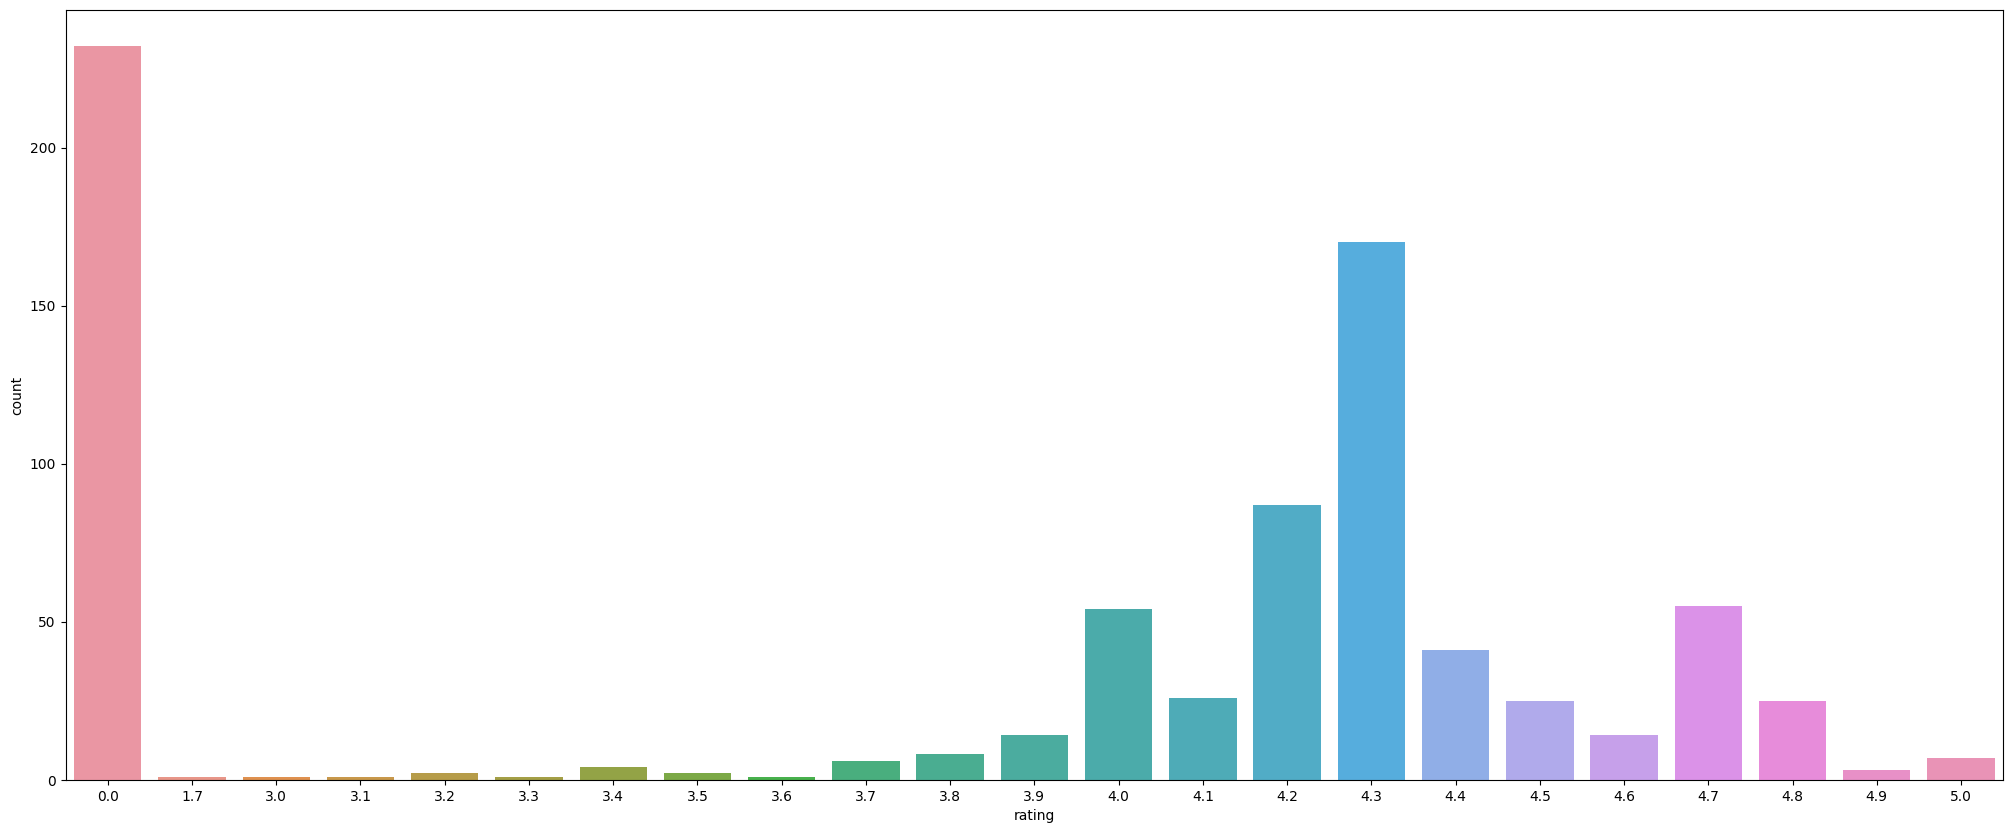

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(data = laptops, x = 'rating')

<Axes: ylabel='price'>

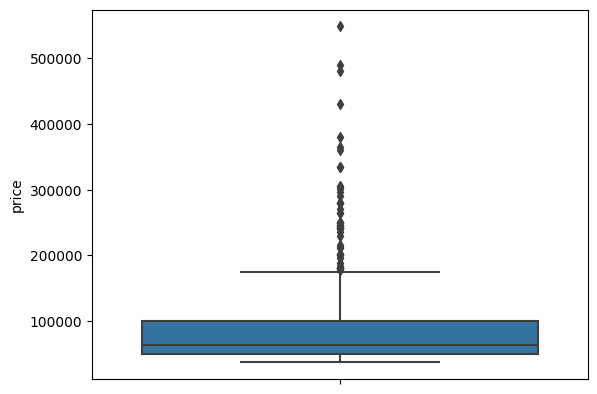

In [ ]:
sns.boxplot(y=laptops['price'])

<Axes: ylabel='rating'>

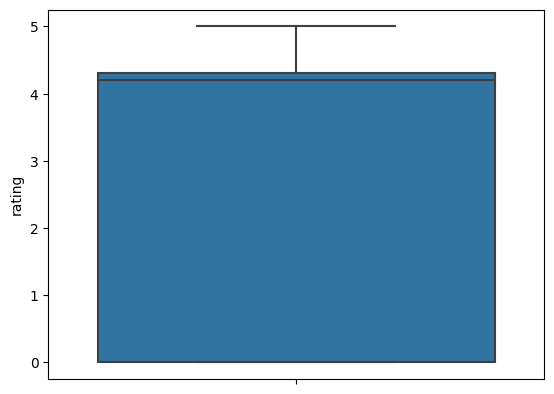

In [ ]:
sns.boxplot(y=laptops['rating'])

# multivariate

<Axes: xlabel='brand', ylabel='price'>

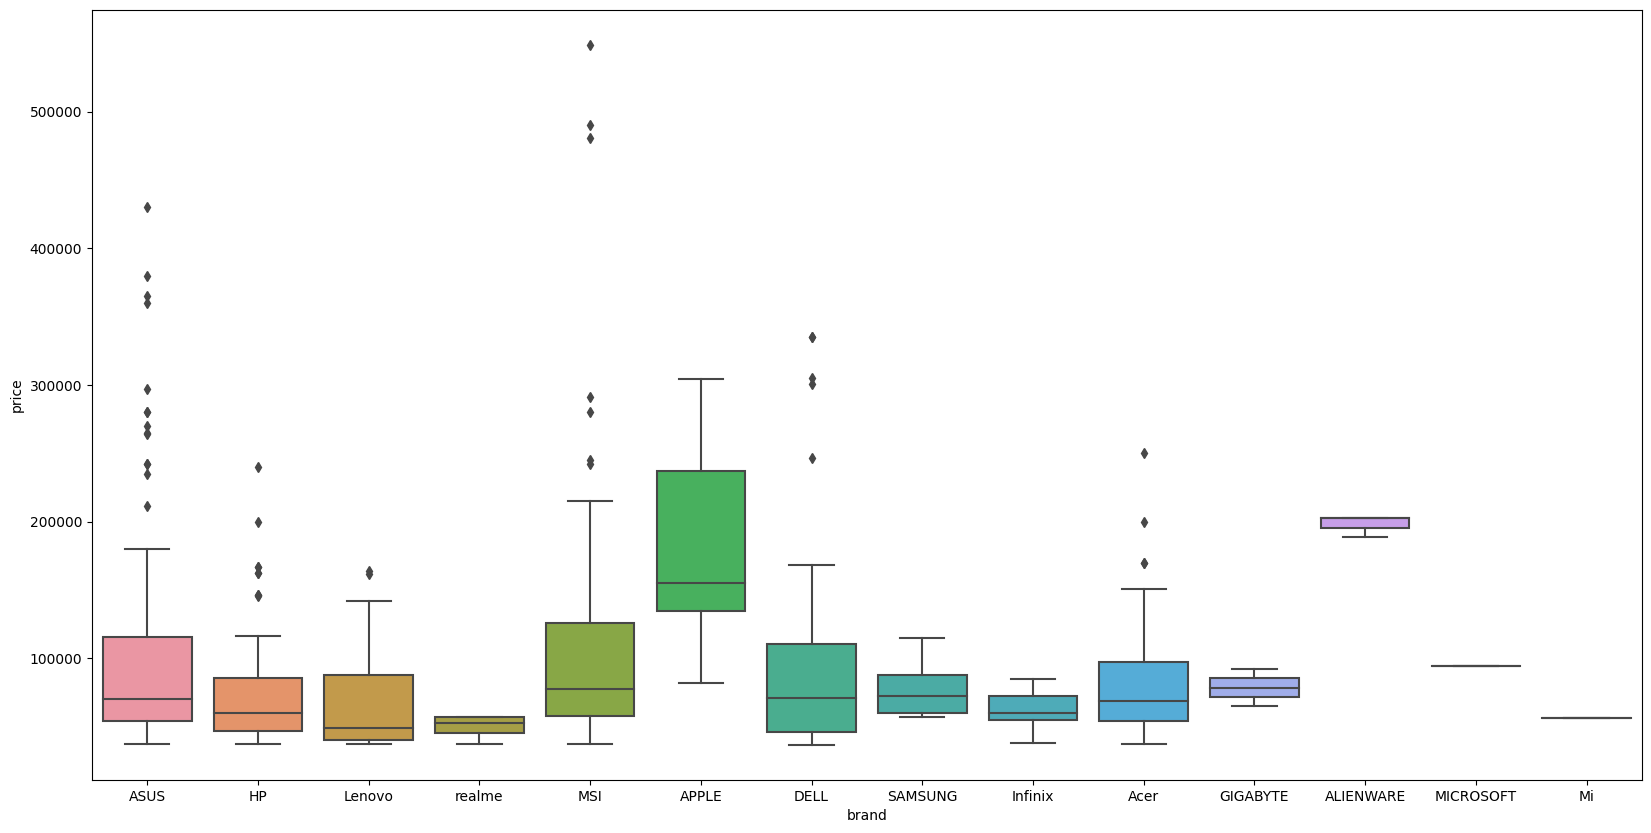

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x = laptops.brand, y = laptops.price)

<Axes: xlabel='brand', ylabel='rating'>

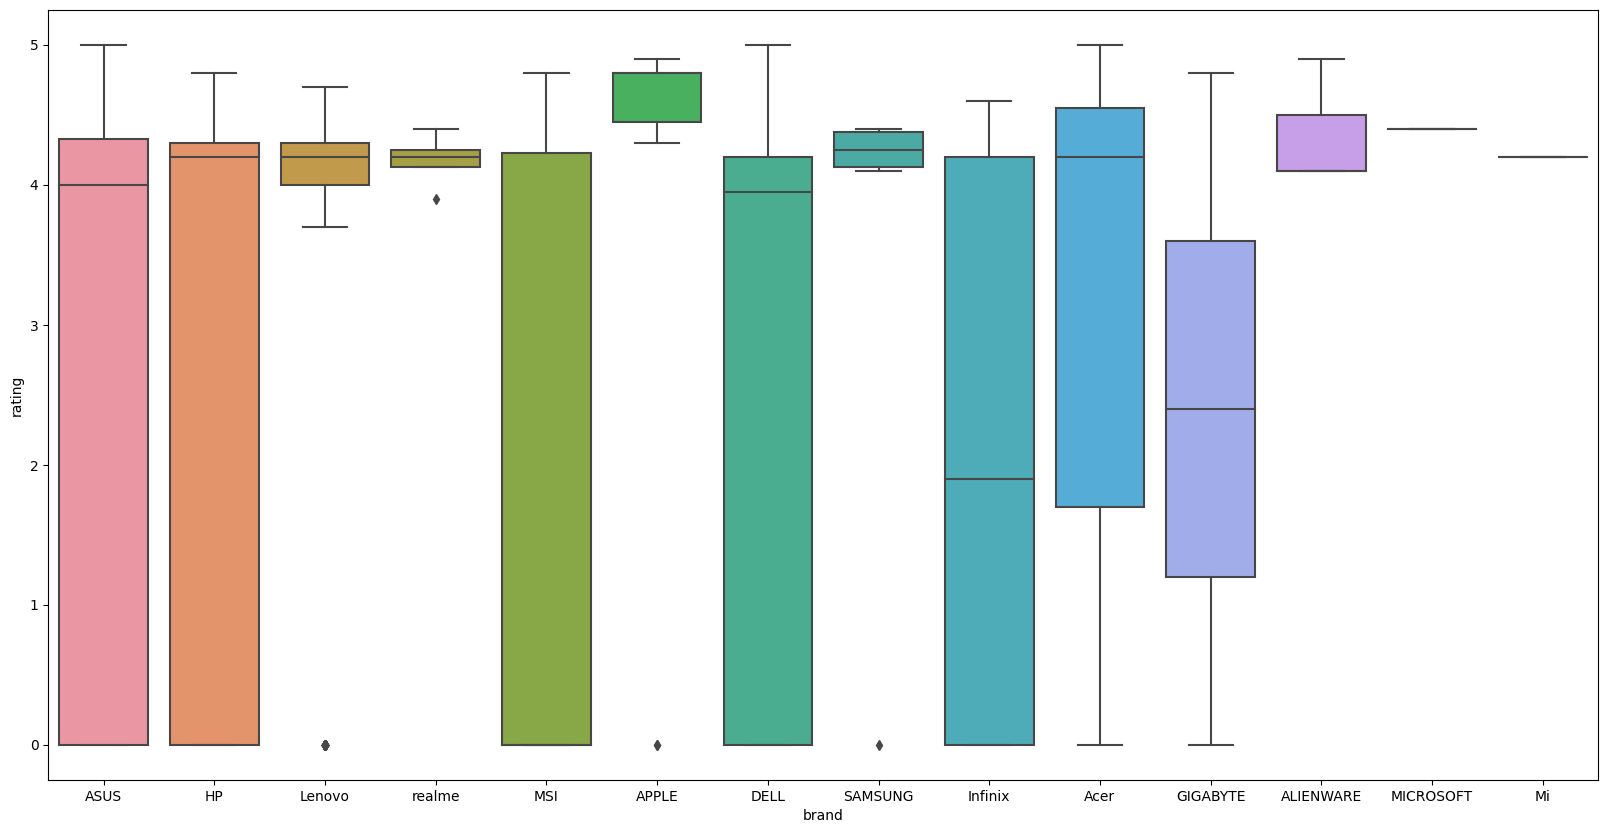

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x = laptops.brand, y = laptops.rating)

<Axes: xlabel='brand', ylabel='price'>

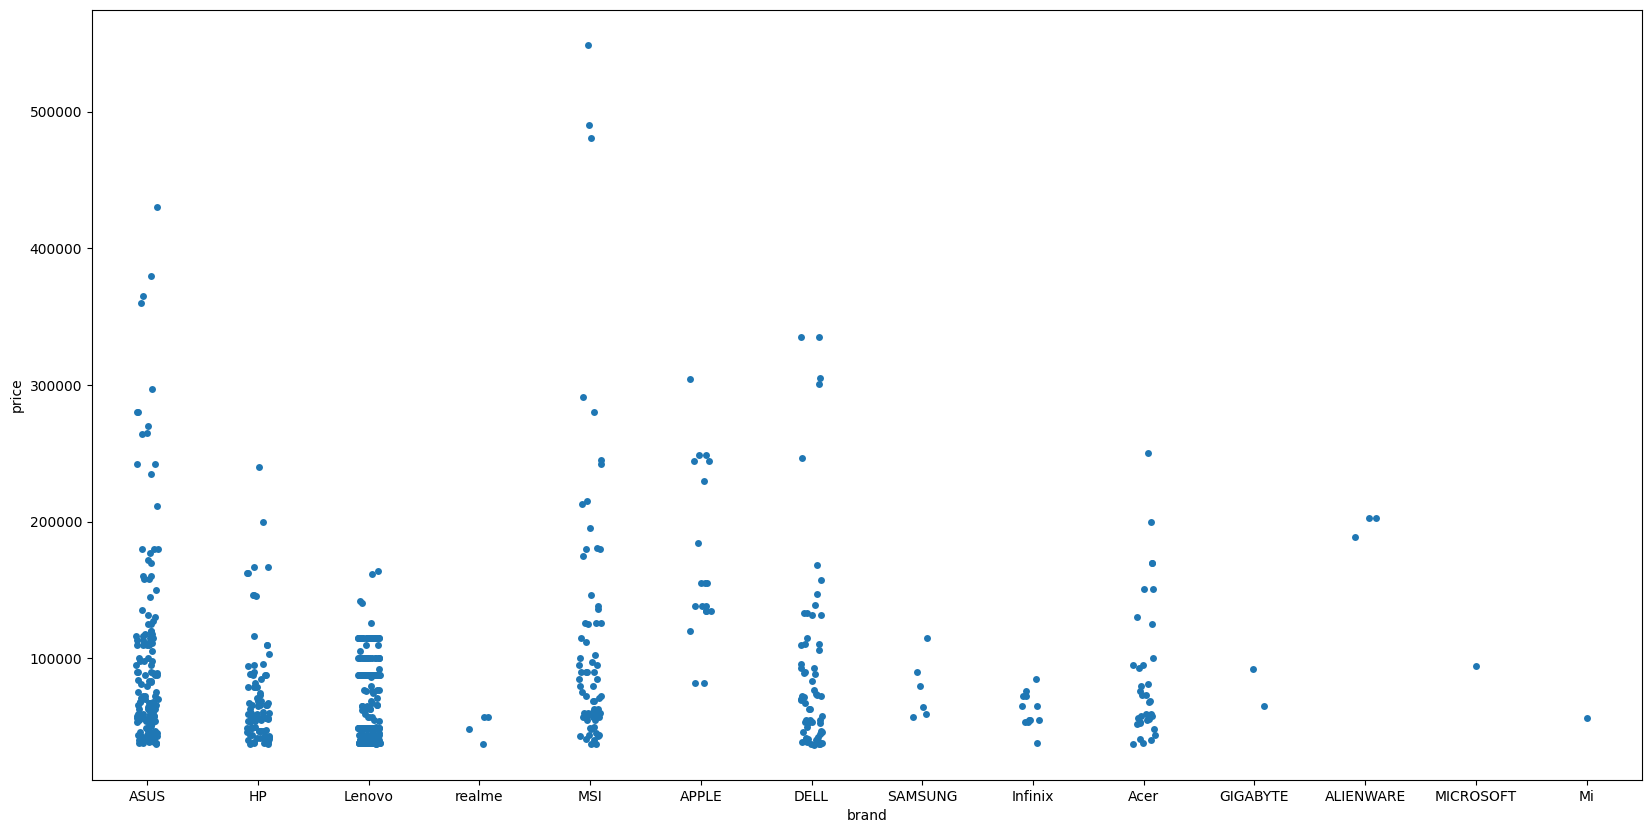

In [ ]:
plt.figure(figsize=(20,10))
sns.stripplot(x = laptops.brand, y = laptops.price)

In [ ]:
laptops.head()

,index,productname,price,specifications,rating,pagenumber,brand,RAM
0,3,ASUS Vivobook 15 Core i5 11th Gen - (8 GB/512 ...,42990.0,Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...,4.3,1,ASUS,8 GB DDR4
1,5,HP Intel Core i5 11th Gen - (8 GB/512 GB SSD/W...,49990.0,Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...,4.3,1,HP,8 GB DDR4
2,8,HP 15s (2023) Intel Core i5 11th Gen - (16 GB/...,52990.0,Intel Core i5 Processor (11th Gen)16 GB DDR4 R...,4.3,1,HP,16 GB DDR4
3,10,Lenovo LOQ Core i7 13th Gen - (16 GB/512 GB SS...,114990.0,Intel Core i7 Processor (13th Gen)16 GB DDR5 R...,4.7,1,Lenovo,16 GB DDR5
4,11,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen -...,48990.0,Intel Core i5 Processor (11th Gen)16 GB DDR4 R...,4.2,1,Lenovo,16 GB DDR4


In [ ]:
laptops['specifications'][5]

'Stylish & Portable Thin and Light Laptop14 inch 2K QHD, IPS LCD Display ( 400nits peak brightness, 100% sRGB, 3:2 aspect ratio, Full Vision Display)Finger Print Sensor for Faster System AccessLight Laptop without Optical Disk DriveIntel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 10 Operating System256 GB SSD35.56 cm (14 inch) DisplayNA1 Year Domestic Warranty'